In [92]:
from IPython.core.debugger import set_trace

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

In [93]:
df = pd.read_csv("BBCA-small-arima.csv")
df

,Date,Close
0,03/01/2022,7325.0
1,04/01/2022,7400.0
2,05/01/2022,7362.5
3,06/01/2022,7425.0
4,07/01/2022,7462.5
5,10/01/2022,7562.5
6,11/01/2022,7625.0
7,12/01/2022,7650.0
8,13/01/2022,7700.0
9,14/01/2022,7700.0


In [94]:
df = df[["Close"]].copy()

In [95]:
df.describe()

,Close
count,15.000000
mean,7593.333333
std,158.104471
min,7325.000000
25%,7443.750000
50%,7650.000000
75%,7706.250000
max,7800.000000


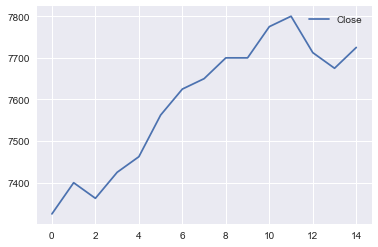

In [96]:
df.plot()
plt.show()

In [97]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

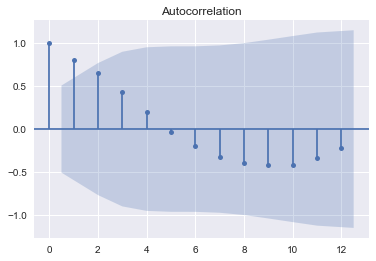

In [98]:
plot_acf(df)
plt.show()

In [99]:
n = int(len(df) * 0.8)
train = df.Close[:n]
test = df.Close[n:]

In [100]:
print(len(train))
print(len(test))

12
3


In [102]:
train

0     7325.0
1     7400.0
2     7362.5
3     7425.0
4     7462.5
5     7562.5
6     7625.0
7     7650.0
8     7700.0
9     7700.0
10    7775.0
11    7800.0
Name: Close, dtype: float64

In [101]:

test

12    7712.5
13    7675.0
14    7725.0
Name: Close, dtype: float64

In [78]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train, lags=2).fit()


/Users/yoelagustinus/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [79]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                   12
Model:                     AutoReg(2)   Log Likelihood                 -49.390
Method:               Conditional MLE   S.D. of innovations             33.787
Date:                Sun, 20 Mar 2022   AIC                              7.840
Time:                        12:21:51   BIC                              7.961
Sample:                             2   HQIC                             7.707
                                   12                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -53.9451    595.911     -0.091      0.928   -1221.909    1114.018
Close.L1       0.5894      0.279      2.110      0.035       0.042       1.137
Close.L2       0.4256      0.284      1.501      0.1

In [80]:
forecasts = model.forecast(3).tolist()
test_values = test.tolist()
for index in range(len(forecasts)):
  difference = forecasts[index] - test_values[index]
  print(forecasts[index], test_values[index], difference)


7852.005527364925 7712.5 139.505527364925
7893.295443233821 7675.0 218.29544323382106
7939.762867504574 7725.0 214.7628675045744


In [81]:
forecasts

[7852.005527364925, 7893.295443233821, 7939.762867504574]